In [2]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers

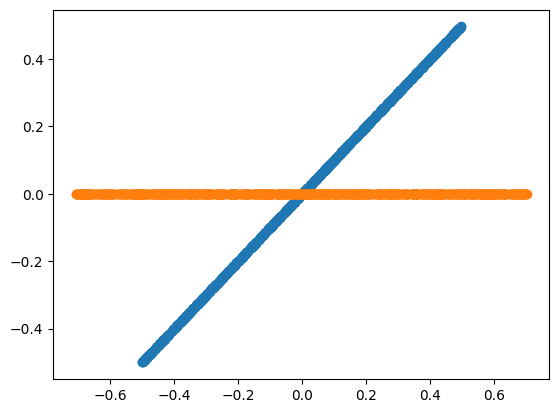

In [3]:
np.random.seed(1) ##fixing the randomness 
n = 1 #the amount of the correlation, the data is perfectly coorelated (correlation = 1)
x = np.random.uniform(1,2,1000) #Generate 1000 samples from a unifrom random variable
y = x.copy() * n # Make n * x

# PCA works better if the data is centerd 
x = x - np.mean(x) # Center x. remove its mean
y = y - np.mean(y) # Center y. remove its mean
"""
why do we center?
PCA looks for direction of maximum variance
if the mean is not zero, PCA would treat the mean as part of variance
centering shifts data so that mean x and mean y = 0
this gives correct principal components
"""


data = pd.DataFrame({'x':x,'y':y}) #create a data frame with x and y
plt. scatter(data.x,data.y) #Plot the original correlated data in blue

pca = PCA (n_components=2) # Instantiate a PCA. here we tell PCA to extract 2 principal components from the data
                           #since the data is 2-dimensional, the maximum PCs is 2
                            

# Create the transformation model for this data. Internally,
# it gets the rotation matrix and the explained variance
pcaTr = pca.fit(data)
"""  
during the fit(), PCA learns:
    the rotation matrix (eigenvectors)
    the explained variance (eigenvalues)
PCA is basically doing:
    how does the data vary
    which direction has most variance? (first principal component)
    which direction has second most variance? (second PC)
"""

rotatedData = pcaTr.transform(data) #transform the data base on the rotation matrix of pcaTr
# Create a data frame with the new vairables. we call these new variables pc1 and pc2
""" 
i.e.
this applies the PCA rotation matrix and gives new coordinates:
    PC1(high variance direction)
    PC2(low variance direction)
so the diagonal line becomes vertical or horizontal
so we are rotating the dataset to align with axes
"""

dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

#plot the transformed data in orange
plt.scatter(dataPCA.PC1,dataPCA.PC2) 
"""
All points will lie roughly along the PC1 axis
PC2 will be ~0 for all points (because data is perfectly correlated)
PC1 captures 100% of variance
PC2 captures almost zero variance
"""
plt.show()


## Understanding the transformation model pcaTr

In [4]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print (pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[0.16646523 0.        ]


## correlation normal random variables

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


<function matplotlib.pyplot.show(close=None, block=None)>

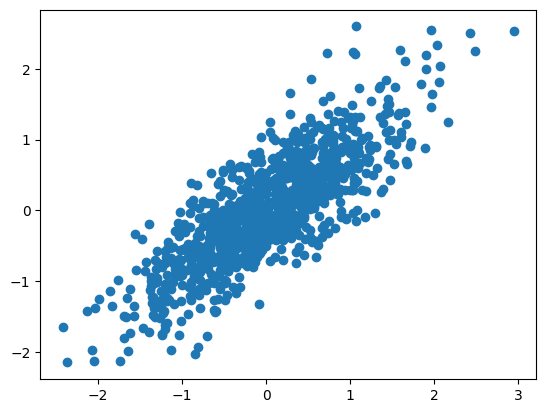

In [6]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms


"""
the goal of this code is to generate uncorrelated Gaussian data
then rotating it to introducee correlation between x and y

this is the opposite of what PCA does 
PCA removes correlation
this code adds correlation using a rotation matrix
"""

np.random.seed(100)

#Generate two Gaussian variables
std1 = 1 # the desired standard deviation of our first random variable
std2 = 0.333 # the desired standard deviation of our second random variable

x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000) # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1000) * noiseLevel * np.sin(0.78)
## x and y variables are independent and uncorrelated


#PCA works better if the data is centerd
x = x - np.mean(x) #Center X
y = y - np.mean(y) #Center y


#Define desired covariance direction ( a pair of dependent variables with a desired amount of covariance)
n = 1 #amount of comvariance
angle = np.arctan(1/n) #convert the covariance to an angle 
#Since n = 1, the angle = arctan(1) = 45° this means the data will rotate by 45°
#why? bec rotating uncorrelated data by 45° introduces correlation between x' and y'

print('angle: ', angle * 180 / math.pi)

#create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos (angle)]])
#it rotates the points by angle clockwise

print("rotationMatrix")
print(rotationMatrix)

xy = np.concatenate(([x],[y]), axis = 0).T #create a matrix with columns x and y
"""
This gives shape:
(1000,2)
Row = one data point
column 0 = x
column 1 = y
"""


# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) 
"""
this multiplies each point [x,y] by the rotation matrix
this rotates all points bby the angle that computed (45)
return a nD array

Before rotaion:
    x and y are uncorrelated
    distribution is an axis-aligned ellips
after rotation:
    the elipse is rotated
    now x' and y' have non-zero covariance
    i.e., the variables become correlated
This the opposite of PCA
PCA finds rotation that makes covariance zero
this code applies rotation to create covariance
"""
#print the rotated data
plt.scatter(data[:,0],data[:,1])
plt.show

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Eigenvalues or explained variance
[1.09488457 0.11243237]


C:\Users\hamza\AppData\Local\Temp\ipykernel_5012\3845989369.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
C:\Users\hamza\AppData\Local\Temp\ipykernel_5012\3845989369.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


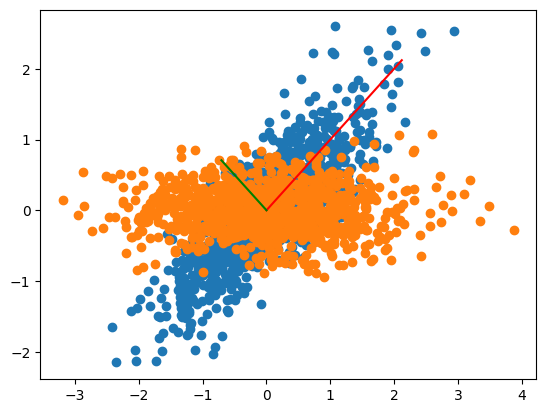

In [7]:
# This code is re applying PCA on the same data we apply the opposite of PCA on
# Start with independent Gaussians, rotate them (which makes them correlated), then PCA tries to rotate them back.
plt.scatter (data[:,0], data[:,1]) #print the original in blue

#apply PCA. in theory, the Eigenvector matrix must be the inverse of the original rotationMatrix

pca = PCA(n_components=2)# get 2 principal components

#create the transformation model for this data
#internally it gets the rotation matrix and the explained variance
pcaTr = pca.fit(data)

#create an array with the ransfformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
"""
Eigenvectors(components_):
    tell the direction of the principal axes
    becase the data has been roteated already using a rotation matrix, 
    PCA should recover approximatel the inverse rotation  
Eigenvalues (explained_variance_)
    This tells how much variance each principle component captures
    since data was elongated:
    first component has high variance
    second component has almost zero variance bec on direction was originally thin (std2 = 0.333)
"""

print ()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

#print the rotated data
plt.scatter(dataPCA[:,0],dataPCA[:,1])

#plot the first compnent axe. use the variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()
